In [4]:
using Random, Distributions
using Plots
# plotlyjs()
# using PlotlyJS
using DataFrames
using StatsBase
using DelimitedFiles
using LinearAlgebra
# using Distances
# using Symbolics
# using Latexify
using LsqFit
using Clustering

# Problem Set 6 (Jonathan Fischer using Julia)

## 1) Non-linear fitting

In [33]:
function read_rxnrates()
    readdlm("rate_vs_conc.dat")
end

read_rxnrates (generic function with 1 method)

In [34]:
data = read_rxnrates()

25×2 Matrix{Float64}:
 0.1  2.0947
 0.3  3.02743
 0.5  3.45027
 0.7  3.53353
 0.9  3.66932
 1.1  3.76629
 1.3  3.64593
 1.5  3.65032
 1.7  3.85984
 1.9  3.78112
 2.1  3.87496
 2.3  3.94252
 2.5  3.79529
 2.7  3.81019
 2.9  3.87909
 3.1  3.88815
 3.3  3.91745
 3.5  3.91305
 3.7  3.81003
 3.9  3.87948
 4.1  3.87203
 4.3  3.80416
 4.5  3.84712
 4.7  4.04025
 4.9  4.02233

In [35]:
@. mm_model(S,beta) = (beta[1]*S)/(beta[2]+S)

mm_model (generic function with 1 method)

In [36]:
xdata = data[:,1] #independent data, concentrations S
ydata = data[:,2] #dependent data, reaction rates
beta0 = [4.0, 0.2] #inital guess for Vmax and Km 

2-element Vector{Float64}:
 4.0
 0.2

In [37]:
fit = curve_fit(mm_model,xdata,ydata,beta0)

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}}([3.9910454568457787, 0.08993779127200312], [0.006538516006389994, 0.04309184485229167, -0.06767623122512356, 0.003113386276485386, -0.040864956069228686, -0.07689804951897461, 0.08687240115708361, 0.11496784014494121, -0.06933249974881583, 0.029547537503409327  …  -0.009624336023883018, -0.032293306949893186, -0.021992381955471263, 0.08630474442975933, 0.021605597516531905, 0.0333511263958548, 0.10512277602854647, 0.0657222947217635, -0.1241436118430479, -0.10321446863976735], [0.5264881692508658 -11.062770626469117; 0.7693534884600133 -7.874396414826567; … ; 0.981223599291017 -0.8175696969153982; 0.981976169840106 -0.7854028838322992], true, Float64[])

In [41]:
fit.param

2-element Vector{Float64}:
 3.9910454568457787
 0.08993779127200312

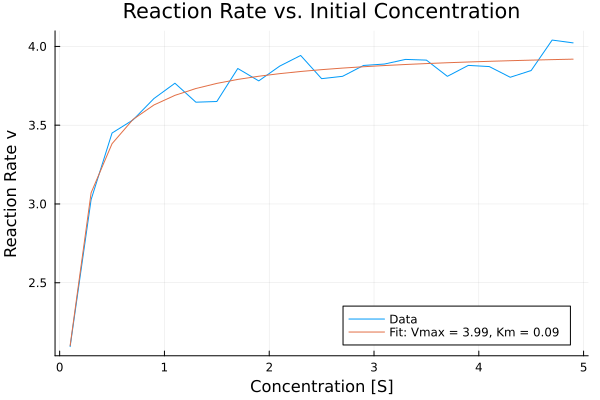

In [51]:
plot(xdata,ydata, label = "Data", title="Reaction Rate vs. Initial Concentration",legend=:bottomright)
plot!(xdata, mm_model(xdata,fit.param), label = "Fit: Vmax = $(round(fit.param[1],digits = 2)), Km = $(round(fit.param[2],digits=2))")
xlabel!("Concentration [S]")
ylabel!("Reaction Rate v")

In [38]:
sigma = stderror(fit)
# to get margin of error and confidence interval of each parameter at 5% significance level:
margin_of_error = margin_error(fit, 0.05)
confidence_inter = confidence_interval(fit, 0.05)

2-element Vector{Tuple{Float64, Float64}}:
 (3.9508499222409044, 4.0312409914506535)
 (0.07913521961267564, 0.1007403629313306)

### d) Variance of parameter fit

In [56]:
println("Variance of Vmax = $(margin_of_error[1])") 
println("Variance of Km = $(margin_of_error[2])")

Variance of Vmax = 0.040195534604874385
Variance of Km = 0.01080257165932748


## 2) Clustering using k-means

In [96]:
clustdata = rotl90(readdlm("clust_data.dat"))

2×200 Matrix{Float64}:
  2.88312  2.6798    3.81752   3.49016   …  -3.76524  -0.511051  0.616878
 -1.13397  1.18434  -4.53839  -0.194999      5.89073   6.27067   6.19463

In [97]:
clusters = kmeans(clustdata, 2)

assigns = assignments(clusters) #get assignments of points to clusters
sizes = counts(clusters) #get cluster sizes
centers = clusters.centers #get cluster centers

2×2 Matrix{Float64}:
 -0.222084   3.16367
  5.84392   -0.608549

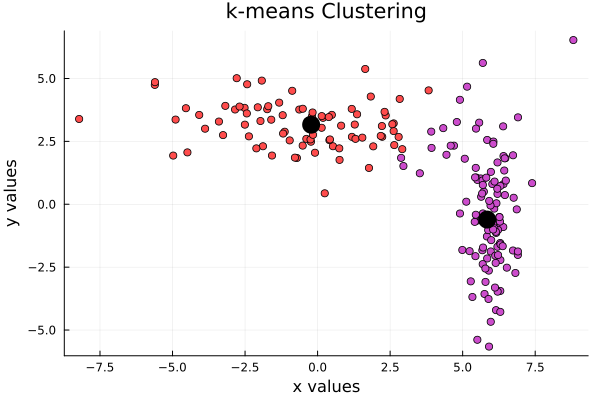

In [105]:
scatter(clustdata[2,:],clustdata[1,:], marker_z = clusters.assignments, color = :lightrainbow, legend=false, title="k-means Clustering")
scatter!(centers[:,1],centers[:,2],markercolor= :black, markersize = 10)
xlabel!("x values")
ylabel!("y values")

## 3) Clustering and Markov State Models

In [7]:
xtraj = readdlm("Xvstime.dat")
ytraj = readdlm("Yvstime.dat")
ztraj = readdlm("Zvstime.dat")
traj = cat(xtraj,ytraj,ztraj, dims=3)

10×500001×3 Array{Float64, 3}:
[:, :, 1] =
 -34.7416  -34.7436  -34.7456  -34.7475  …  -45.0737  -45.0716  -45.0695
 -35.4515  -35.4576  -35.4636  -35.4697     -46.1405  -46.1428  -46.1453
 -36.0034  -36.0022  -36.001   -35.9997     -47.0515  -47.0512  -47.0508
 -35.8079  -35.8087  -35.8096  -35.8104     -45.9729  -45.9723  -45.9714
 -34.9422  -34.9448  -34.9475  -34.9501     -45.981   -45.9795  -45.9779
 -34.6659  -34.6582  -34.6504  -34.6427  …  -47.0449  -47.0473  -47.0496
 -34.2428  -34.2455  -34.2481  -34.2508     -46.4067  -46.4045  -46.4025
 -35.1962  -35.1934  -35.1908  -35.1881     -47.1033  -47.1035  -47.1037
 -34.4876  -34.4811  -34.4746  -34.4682     -46.1683  -46.1634  -46.1585
 -34.4024  -34.4064  -34.4105  -34.4146     -45.6626  -45.6593  -45.656

[:, :, 2] =
 -106.491  -106.482  -106.473  -106.464  …  -136.075  -136.077  -136.079
 -106.831  -106.833  -106.835  -106.838     -134.976  -134.976  -134.975
 -106.82   -106.826  -106.831  -106.836     -134.27   -134.27   -134.

In [8]:
function get_internaldistances(traj)
    features = Array{Float64}(undef,7,size(traj)[2])
    for (i,t) in enumerate(eachslice(traj, dims=2))
        features[1,i] = norm(t[1,:]-t[10,:])
        features[2,i] = norm(t[1,:]-t[4,:])
        features[3,i] = norm(t[1,:]-t[5,:])
        features[4,i] = norm(t[2,:]-t[6,:])
        features[5,i] = norm(t[4,:]-t[7,:])
        features[6,i] = norm(t[5,:]-t[10,:])
        features[7,i] = norm(t[5,:]-t[9,:])
    end
    return features 
end

get_internaldistances (generic function with 1 method)

In [9]:
features = get_internaldistances(traj)

7×500001 Matrix{Float64}:
 2.56024  2.56817  2.57601  2.58393  2.59188  …  3.16938  3.17205   3.17468
 1.99799  2.00604  2.01419  2.02242  2.03073     2.78243  2.78909   2.7958
 1.68688  1.69755  1.70828  1.71904  1.72988     3.46962  3.47411   3.47861
 2.53469  2.53906  2.54328  2.54769  2.55201     2.47079  2.47411   2.47718
 2.05153  2.0499   2.04845  2.04698  2.04539     0.944    0.944072  0.945135
 1.22834  1.22489  1.22144  1.21806  1.21458  …  1.25649  1.25389   1.25127
 1.75366  1.75945  1.76514  1.77088  1.77662     2.38161  2.38074   2.37986

In [10]:
stateclusters = kmeans(features, 6)

KmeansResult{Matrix{Float64}, Float64, Int64}([3.2769211380561813 3.1019761799476298 … 3.6975611703385054 1.8815073841905956; 2.344633020141585 1.7135935163993723 … 1.7540173395573844 2.0338950417674795; … ; 1.828255417908352 2.269506411265531 … 3.4199103120880783 2.657838831884602; 1.833226171606071 2.0093601573392115 … 2.925562626025691 2.495498187228649], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0.8786283253107356, 0.8977120141773938, 0.9172203315390774, 0.9376420403222454, 0.9587085153978379, 0.9804657411366549, 1.0031796976933194, 1.0267906661407409, 1.0511423175948238, 1.0758909856099095  …  1.7946820372290233, 1.8176156872138876, 1.8391537297625433, 1.8595549252662806, 1.8786198121596556, 1.895737347231318, 1.9111639996240086, 1.925099512076173, 1.936779410104279, 1.947091889933958], [79204, 99496, 55678, 112353, 64782, 88488], [79197, 99491, 55687, 112353, 64784, 88489], 871180.2032339124, 100, false)

In [11]:
stateclusters.centers

7×6 Matrix{Float64}:
 3.27692  3.10198  4.78871  1.97857  3.69756  1.88151
 2.34463  1.71359  2.31783  1.71671  1.75402  2.0339
 2.88029  1.77577  2.81032  1.82012  1.90504  2.42304
 2.59916  1.86087  2.68391  2.00661  1.92708  1.89531
 1.79866  1.78835  2.04973  1.94215  1.96866  1.68461
 1.82826  2.26951  2.77366  1.60964  3.41991  2.65784
 1.83323  2.00936  2.31459  1.66886  2.92556  2.4955

In [32]:
function count_trans(clusters)
    trans_matrix = zeros((6,6)) #Array{Float64}(0, 6,6)
    a_prev = clusters.assignments[1]
    for a in clusters.assignments[1:50:end]
        trans_matrix[a_prev,a] += 1 
        a_prev = a 
    end

    # normalize!.(eachrow(trans_matrix))
    for (i,row) in enumerate(eachrow(trans_matrix))
        trans_matrix[i,:] = row./sum(row)
    end
    return trans_matrix
end

count_trans (generic function with 1 method)

In [33]:
trans_matrix = count_trans(stateclusters)

6×6 Matrix{Float64}:
 0.814978    0.0585274  0.0440529   0.0415356  0.00566394  0.0352423
 0.0530531   0.78979    0.00850851  0.0675676  0.0500501   0.031031
 0.0624434   0.0190045  0.868778    0.0        0.0497738   0.0
 0.0321285   0.0580098  0.0         0.851406   0.0         0.058456
 0.00616333  0.0893683  0.0446841   0.0        0.837442    0.0223421
 0.0225989   0.0338983  0.0         0.0740113  0.0265537   0.842938

In [34]:
sum(trans_matrix[1,:])

1.0

In [30]:
trans_matrix[1,:]

6-element Vector{Float64}:
 0.9937614081912893
 0.07136664939134356
 0.053716832875204824
 0.050647299568050266
 0.006906449941097763
 0.04297346630016386

In [35]:
features

7×500001 Matrix{Float64}:
 2.56024  2.56817  2.57601  2.58393  2.59188  …  3.16938  3.17205   3.17468
 1.99799  2.00604  2.01419  2.02242  2.03073     2.78243  2.78909   2.7958
 1.68688  1.69755  1.70828  1.71904  1.72988     3.46962  3.47411   3.47861
 2.53469  2.53906  2.54328  2.54769  2.55201     2.47079  2.47411   2.47718
 2.05153  2.0499   2.04845  2.04698  2.04539     0.944    0.944072  0.945135
 1.22834  1.22489  1.22144  1.21806  1.21458  …  1.25649  1.25389   1.25127
 1.75366  1.75945  1.76514  1.77088  1.77662     2.38161  2.38074   2.37986

In [36]:
traj

10×500001×3 Array{Float64, 3}:
[:, :, 1] =
 -34.7416  -34.7436  -34.7456  -34.7475  …  -45.0737  -45.0716  -45.0695
 -35.4515  -35.4576  -35.4636  -35.4697     -46.1405  -46.1428  -46.1453
 -36.0034  -36.0022  -36.001   -35.9997     -47.0515  -47.0512  -47.0508
 -35.8079  -35.8087  -35.8096  -35.8104     -45.9729  -45.9723  -45.9714
 -34.9422  -34.9448  -34.9475  -34.9501     -45.981   -45.9795  -45.9779
 -34.6659  -34.6582  -34.6504  -34.6427  …  -47.0449  -47.0473  -47.0496
 -34.2428  -34.2455  -34.2481  -34.2508     -46.4067  -46.4045  -46.4025
 -35.1962  -35.1934  -35.1908  -35.1881     -47.1033  -47.1035  -47.1037
 -34.4876  -34.4811  -34.4746  -34.4682     -46.1683  -46.1634  -46.1585
 -34.4024  -34.4064  -34.4105  -34.4146     -45.6626  -45.6593  -45.656

[:, :, 2] =
 -106.491  -106.482  -106.473  -106.464  …  -136.075  -136.077  -136.079
 -106.831  -106.833  -106.835  -106.838     -134.976  -134.976  -134.975
 -106.82   -106.826  -106.831  -106.836     -134.27   -134.27   -134.

In [47]:
avgcoords = Array{Float64}(undef, 10,6,3)
for (i,_) in enumerate(eachslice(traj, dims=2))
    avgcoords[:,stateclusters.assignments[i],:] += traj[:,i,:]
end

# for (i,_) in enumerate(eachslice(avgcoords,dims=2))
#     avgcoords[:,i,:] ./ 
# end


In [48]:
avgcoords

10×6×3 Array{Float64, 3}:
[:, :, 1] =
 -5.8766e6   -7.74072e6  -4.03027e6  -8.5813e6   -4.95147e6  -6.44172e6
 -5.8807e6   -7.74268e6  -4.03001e6  -8.58027e6  -4.95319e6  -6.44614e6
 -5.88316e6  -7.74208e6  -4.02886e6  -8.58076e6  -4.95238e6  -6.44763e6
 -5.88228e6  -7.73806e6  -4.02942e6  -8.5762e6   -4.94647e6  -6.45044e6
 -5.88306e6  -7.732e6    -4.03005e6  -8.57329e6  -4.94665e6  -6.44974e6
 -5.88247e6  -7.73237e6  -4.02845e6  -8.57059e6  -4.94456e6  -6.44213e6
 -5.88452e6  -7.7319e6   -4.02706e6  -8.57617e6  -4.94347e6  -6.44595e6
 -5.88023e6  -7.72825e6  -4.02806e6  -8.57245e6  -4.94347e6  -6.44202e6
 -5.87842e6  -7.72399e6  -4.02997e6  -8.56735e6  -4.93976e6  -6.43865e6
 -5.87597e6  -7.72031e6  -4.02912e6  -8.56741e6  -4.93647e6  -6.43132e6

[:, :, 2] =
 -1.06387e7  -1.39215e7  -7.21167e6  -1.58597e7  -8.6591e6   -1.24379e7
 -1.06388e7  -1.39237e7  -7.21363e6  -1.58578e7  -8.65891e6  -1.24366e7
 -1.06409e7  -1.39233e7  -7.21368e6  -1.58564e7  -8.65551e6  -1.24343e7
 -1.06409e7  

In [45]:
traj[:,1,:]

10×3 Matrix{Float64}:
 -34.7416  -106.491  90.4004
 -35.4515  -106.831  90.179
 -36.0034  -106.82   89.4011
 -35.8079  -106.326  88.7188
 -34.9422  -106.541  88.7263
 -34.6659  -106.276  87.8338
 -34.2428  -105.877  87.4707
 -35.1962  -106.259  86.9435
 -34.4876  -107.107  87.1299
 -34.4024  -107.397  88.0301

In [42]:
[1,2,3]/sum([1,2,3])

3-element Vector{Float64}:
 0.16666666666666666
 0.3333333333333333
 0.5

In [40]:
stateclusters.assignments

500001-element Vector{Int64}:
 4
 4
 4
 4
 4
 4
 4
 4
 4
 4
 4
 4
 4
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [37]:
traj

10×500001×3 Array{Float64, 3}:
[:, :, 1] =
 -34.7416  -34.7436  -34.7456  -34.7475  …  -45.0737  -45.0716  -45.0695
 -35.4515  -35.4576  -35.4636  -35.4697     -46.1405  -46.1428  -46.1453
 -36.0034  -36.0022  -36.001   -35.9997     -47.0515  -47.0512  -47.0508
 -35.8079  -35.8087  -35.8096  -35.8104     -45.9729  -45.9723  -45.9714
 -34.9422  -34.9448  -34.9475  -34.9501     -45.981   -45.9795  -45.9779
 -34.6659  -34.6582  -34.6504  -34.6427  …  -47.0449  -47.0473  -47.0496
 -34.2428  -34.2455  -34.2481  -34.2508     -46.4067  -46.4045  -46.4025
 -35.1962  -35.1934  -35.1908  -35.1881     -47.1033  -47.1035  -47.1037
 -34.4876  -34.4811  -34.4746  -34.4682     -46.1683  -46.1634  -46.1585
 -34.4024  -34.4064  -34.4105  -34.4146     -45.6626  -45.6593  -45.656

[:, :, 2] =
 -106.491  -106.482  -106.473  -106.464  …  -136.075  -136.077  -136.079
 -106.831  -106.833  -106.835  -106.838     -134.976  -134.976  -134.975
 -106.82   -106.826  -106.831  -106.836     -134.27   -134.27   -134.